![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)
# **Counting Circles, Ellipses and Finding Waldo**

####**In this lesson we'll learn:**
1. Mini Project on Counting Circular Blobs


In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 12):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


![](https://i.stack.imgur.com/zYL2C.jpg)
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/simpleblob.png)

# Default holatda blob detect - circle ham ellipse ham birdek 
- Bunda ellipse ovallarga ham circle chizib qoyadi

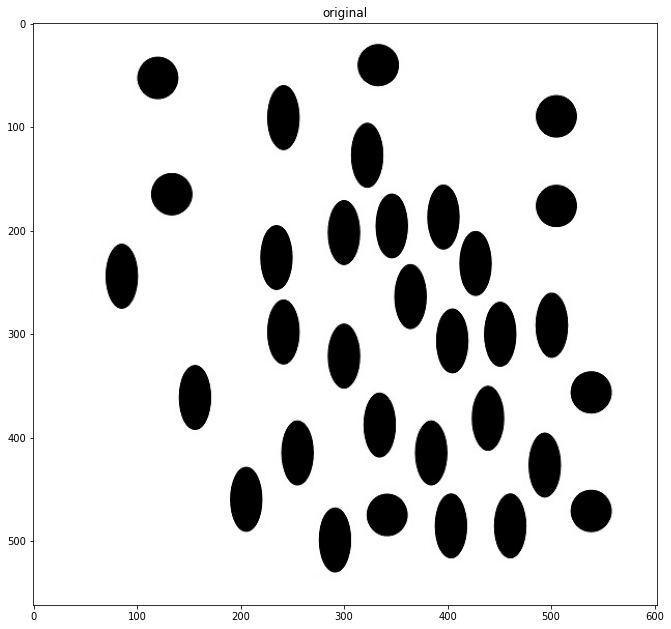

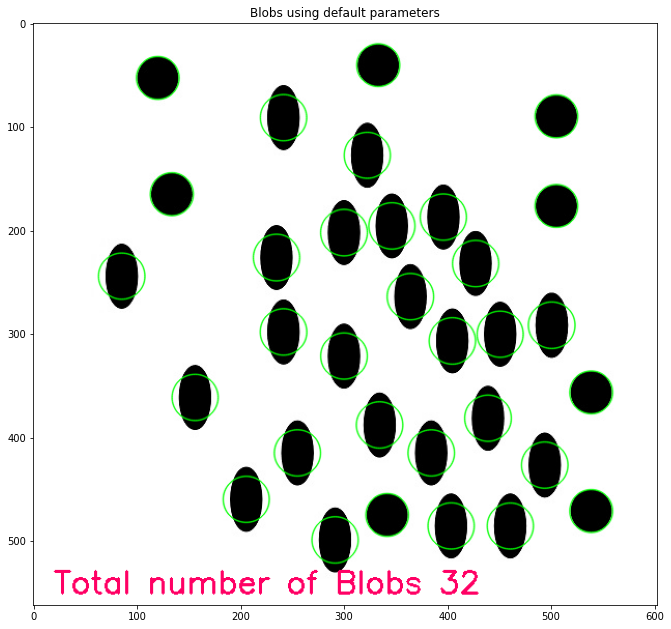

In [13]:
#load image 
image = cv2.imread('Datasets/images/blobs.jpg',0)
imshow("original", image) 

#Initialize blob detector 
detector = cv2.SimpleBlobDetector_create()

#Detect blobs 
keypoints = detector.detect(image)

#Draw blob on image as circle
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total number of Blobs " + str(number_of_blobs) 
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
imshow("Blobs using default parameters", blobs)


# 2-Filter orqali Blob chizish - faqatgina circlarni ozinigan detect qilish

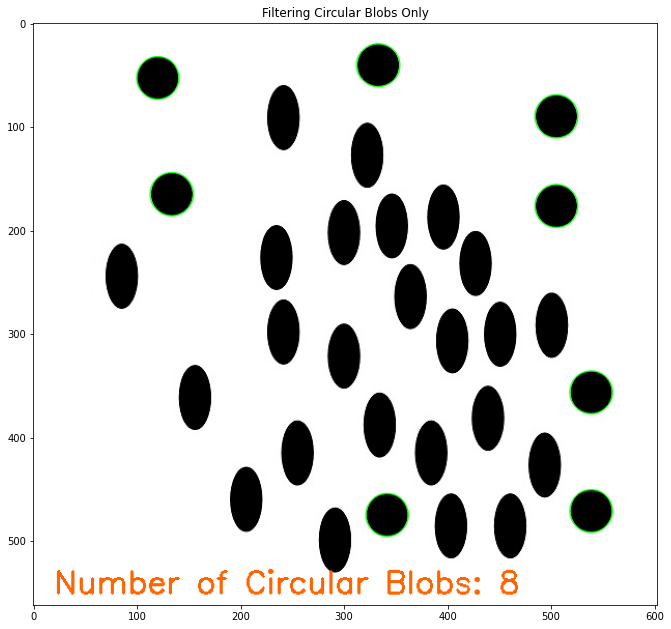

In [14]:
# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2
    
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
    
# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Filtering Circular Blobs Only", blobs)
